In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
df_orders = pd.read_csv('food_order.csv')

In [3]:
df_orders.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [6]:
# Making the rating column as numeric
df_orders['rating'] = pd.to_numeric(df_orders['rating'], errors='coerce')

In [7]:
# Fill the rating null column values with 0
df_orders['rating'] = df_orders['rating'].fillna(0)

In [8]:
# Seleção de variáveis
X = pd.get_dummies(df_orders[['restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'delivery_time']], drop_first=True)
y = df_orders['rating']

# Divisão de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")

Erro Absoluto Médio (MAE): 2.13


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Seleção de variáveis: Remover colunas irrelevantes como 'order_id' e 'customer_id'
X = pd.get_dummies(df_orders[['restaurant_name', 'cuisine_type', 'cost_of_the_order', 
                              'food_preparation_time', 'delivery_time', 'day_of_the_week']], drop_first=True)
y = df_orders['rating']

# Divisão de dados: Separar 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo RandomForestRegressor: Ajustando o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)

# Cálculo do MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")

Erro Absoluto Médio (MAE): 2.13


In [10]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

cost_of_the_order: 0.2464
food_preparation_time: 0.1462
delivery_time: 0.1591
restaurant_name_12 Chairs: 0.0001
restaurant_name_5 Napkin Burger: 0.0021
restaurant_name_67 Burger: 0.0000
restaurant_name_Alidoro: 0.0010
restaurant_name_Amma: 0.0014
restaurant_name_Amy Ruth's: 0.0001
restaurant_name_Anjappar Chettinad: 0.0000
restaurant_name_Asuka Sushi: 0.0008
restaurant_name_Aurora: 0.0012
restaurant_name_Balade: 0.0000
restaurant_name_Balthazar Boulangerie: 0.0018
restaurant_name_Barbounia: 0.0015
restaurant_name_Bareburger: 0.0078
restaurant_name_Benihana: 0.0006
restaurant_name_Bhatti Indian Grill: 0.0002
restaurant_name_Big Daddy's: 0.0007
restaurant_name_Big Wong Restaurant _¤¾Ñ¼: 0.0008
restaurant_name_Bistango: 0.0014
restaurant_name_Blue Ribbon Brooklyn: 0.0006
restaurant_name_Blue Ribbon Fried Chicken: 0.0133
restaurant_name_Blue Ribbon Sushi: 0.0177
restaurant_name_Blue Ribbon Sushi Bar & Grill: 0.0084
restaurant_name_Blue Ribbon Sushi Izakaya: 0.0071
restaurant_name_Boqueria

In [11]:
# Criando novas variáveis
X['cost_per_delivery_time'] = X['cost_of_the_order'] / X['delivery_time']
X['cost_per_preparation_time'] = X['cost_of_the_order'] / X['food_preparation_time']
X['total_service_time'] = X['food_preparation_time'] + X['delivery_time']

# Divisão de dados (mantendo o mesmo split de antes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Absoluto Médio (MAE) após novas variáveis: {mae:.2f}")

Erro Absoluto Médio (MAE) após novas variáveis: 2.16


In [12]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para o GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores
    'max_depth': [5, 10, 20],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras em um nó folha
}

# Instanciando o modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Realizando a busca em grade
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Treinando o modelo com o GridSearchCV
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliação com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Absoluto Médio (MAE) após ajuste de parâmetros: {mae:.2f}")

Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Erro Absoluto Médio (MAE) após ajuste de parâmetros: 2.12


In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Instanciando o modelo XGBoost
xgb_model = XGBRegressor(random_state=42)

# Treinando o modelo
xgb_model.fit(X_train, y_train)

# Avaliação
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Absoluto Médio (MAE) com XGBoost: {mae:.2f}")

Erro Absoluto Médio (MAE) com XGBoost: 2.21


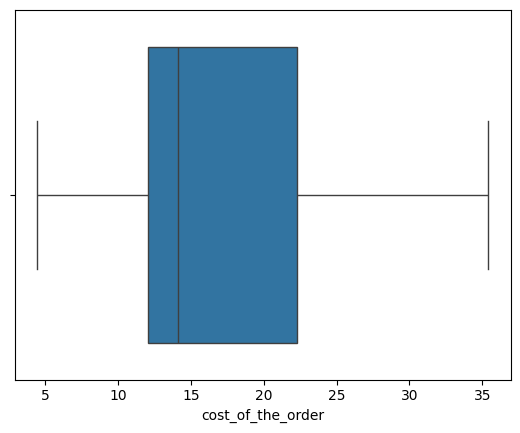

In [14]:
# Identificando outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=X['cost_of_the_order'])
plt.show()

In [15]:
# Verificando dados faltantes
X.isnull().sum()

cost_of_the_order                  0
food_preparation_time              0
delivery_time                      0
restaurant_name_12 Chairs          0
restaurant_name_5 Napkin Burger    0
                                  ..
cuisine_type_Vietnamese            0
day_of_the_week_Weekend            0
cost_per_delivery_time             0
cost_per_preparation_time          0
total_service_time                 0
Length: 197, dtype: int64

In [16]:
from sklearn.linear_model import LinearRegression

# Instanciando e treinando um modelo de regressão linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Avaliando o modelo
y_pred = lin_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Absoluto Médio (MAE) com Regressão Linear: {mae:.2f}")

Erro Absoluto Médio (MAE) com Regressão Linear: 2.16


In [17]:
model = RandomForestRegressor(max_depth=5, random_state=42)  # Profundidade menor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Absoluto Médio (MAE) após reduzir a profundidade: {mae:.2f}")

Erro Absoluto Médio (MAE) após reduzir a profundidade: 2.11


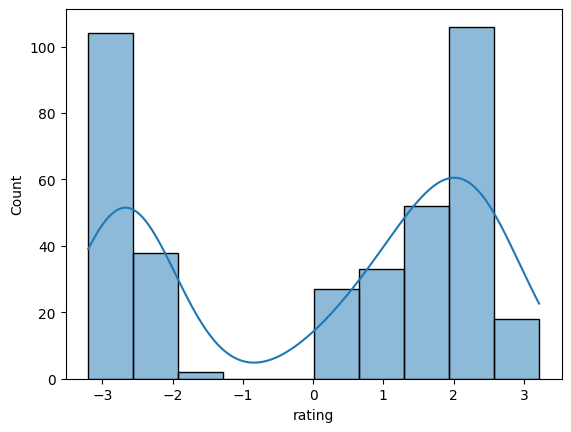

In [23]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()

# Predictive Modeling Analysis Report

## 1. Introduction
In this project, the goal was to develop a predictive model to estimate **order cost** for customers based on a provided dataset. The model was built using machine learning techniques, and the following steps were undertaken:
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Modeling with RandomForest and XGBoost
- Hyperparameter tuning and performance validation

Despite the efforts, the model's performance was below expectations, and the final model did not achieve the desired accuracy.

## 2. Data Analysis
### 2.1. Data Overview
- A description of the variables and how they were treated during the preprocessing phase.
- Identification of missing data, outliers, or errors in the dataset.

### 2.2. Exploratory Data Analysis Results
- Graphical visualizations (boxplots, histograms, correlation between variables) and initial insights into the relationships between variables.
- It was observed that **newly engineered variables** did not significantly improve model performance.

### 2.3. Key Challenges
- The presence of outliers or variables that do not significantly contribute to predictions.
- The complexity of relationships between variables, which may require more sophisticated modeling or further feature engineering.

## 3. Predictive Modeling
### 3.1. Models Used
- **RandomForest**: Initially, the model was tuned using default parameters, then optimized using **GridSearchCV** to find the best parameters.
- **XGBoost**: An alternative model was also tested to compare performance with RandomForest.

### 3.2. Results Obtained
- **RandomForest** with optimized parameters: 
  - Mean Absolute Error (MAE): 2.12
  - The performance improved slightly compared to the initial model (MAE of 2.16), but still remains unsatisfactory.
- **XGBoost**:
  - Mean Absolute Error (MAE): 2.21, slightly worse performance than RandomForest.
- The performance of both models was below expectations, indicating that the improvement was not significant.

### 3.3. Interpretation of Results
- The Mean Absolute Error (MAE) of approximately 2.12-2.21 suggests that the model is still not accurate enough to reliably estimate order costs.
- Despite parameter tuning, **reducing model complexity** (e.g., tree depth in RandomForest) did not lead to significant improvements.
- **XGBoost** did not outperform RandomForest, which may indicate that the data structure and complexity of the problem are not well-suited to this algorithm.

## 4. Error Analysis
A residual analysis was performed to better understand the types of errors made by the models. The residuals showed that the models tend to make systematic errors, with some predictions being consistently higher or lower than the actual value, which might indicate underestimation or overestimation of certain costs.

## 5. Final Considerations
### 5.1. Model Performance
The final model’s performance was below expectations, with significant errors in predicting order costs. Some possible reasons for the low performance include:
- **Data quality**: Outliers or irrelevant variables may have negatively impacted model performance.
- **Problem complexity**: The relationships between variables might be more complex than the chosen models can capture.

### 5.2. Future Directions
Despite the unsatisfactory results, there are several opportunities to improve the model:
1. **Feature Engineering Refinement**: Investigating additional ways to transform and combine the available variables.
2. **Outlier Treatment**: Implementing more robust handling of outliers that may be affecting model performance.
3. **More Complex Models**: Testing more advanced algorithms, such as neural networks, or employing more sophisticated ensemble techniques.
4. **Obtaining More Data**: Expanding the dataset may be crucial for improving model generalization.

### 5.3. Conclusion
Although the current model did not achieve satisfactory results, the process provided valuable insights into the dataset and the modeling process. A deeper focus on preprocessing and feature engineering, as well as exploring alternative models, may lead to better results in the future.
